In [ ]:

!pip install kaggle


In [ ]:
# 2. Import library
import kagglehub
from kagglehub import KaggleDatasetAdapter

# 3. Tentukan path file di dalam dataset Kaggle
# Karena dataset "shivamb/netflix-shows" berisi 1 file utama yaitu netflix_titles.csv
file_path = "netflix_titles.csv"

# 4. Load dataset langsung jadi DataFrame Pandas
df = kagglehub.load_dataset(
    KaggleDatasetAdapter.PANDAS,
    "shivamb/netflix-shows",
    file_path
)

# 5. Cek data
print("First 5 records:")
print(df.head())


/tmp/ipython-input-2192859666.py:10: DeprecationWarning: Use dataset_load() instead of load_dataset(). load_dataset() will be removed in a future version.
  df = kagglehub.load_dataset(


100%|██████████| 1.34M/1.34M [00:00<00:00, 1.85MB/s]

Extracting zip of netflix_titles.csv...
First 5 records:
  show_id     type                  title         director  \
0      s1    Movie   Dick Johnson Is Dead  Kirsten Johnson   
1      s2  TV Show          Blood & Water              NaN   
2      s3  TV Show              Ganglands  Julien Leclercq   
3      s4  TV Show  Jailbirds New Orleans              NaN   
4      s5  TV Show           Kota Factory              NaN   

                                                cast        country  \
0                                                NaN  United States   
1  Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   South Africa   
2  Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...            NaN   
3                                                NaN            NaN   
4  Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...          India   

           date_added  release_year rating   duration  \
0  September 25, 2021          2020  PG-13     90 min   
1  September 24, 2021        

In [ ]:


# 1. Lihat jumlah baris & kolom
print("🔹 Ukuran dataset:", df.shape)

# 2. Lihat tipe data setiap kolom
print("\n🔹 Tipe data tiap kolom:")
print(df.dtypes)

# 3. Cek jumlah missing value per kolom
print("\n🔹 Jumlah missing value per kolom:")
print(df.isnull().sum())

# 4. Cek nilai unik di kolom penting
print("\n🔹 Nilai unik di kolom 'type':", df['type'].unique())
print("🔹 Nilai unik di kolom 'rating':", df['rating'].unique()[:10])  # tampilkan 10 pertama

# 5. Cek data duplikat
duplicates = df.duplicated().sum()
print(f"\n🔹 Jumlah baris duplikat: {duplicates}")

# 6. Cek beberapa baris data untuk memastikan formatnya normal
print("\n🔹 5 Baris Awal:")
print(df.head())


🔹 Ukuran dataset: (8807, 12)

🔹 Tipe data tiap kolom:
show_id         object
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
dtype: object

🔹 Jumlah missing value per kolom:
show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

🔹 Nilai unik di kolom 'type': ['Movie' 'TV Show']
🔹 Nilai unik di kolom 'rating': ['PG-13' 'TV-MA' 'PG' 'TV-14' 'TV-PG' 'TV-Y' 'TV-Y7' 'R' 'TV-G' 'G']

🔹 Jumlah baris duplikat: 0

🔹 5 Baris Awal:
  show_id     type                  title         director  \
0      s1    Movie   Dick Johnson Is Dead  Kirsten Johnson   
1      s2  TV Show          Blood &

In [ ]:
# --- MEMBERSIHKAN DATASET ---

# Isi missing value dengan 'Unknown'
df['director'].fillna('Unknown', inplace=True)
df['cast'].fillna('Unknown', inplace=True)
df['country'].fillna('Unknown', inplace=True)
df['date_added'].fillna('Unknown', inplace=True)
df['rating'].fillna('Unknown', inplace=True)
df['duration'].fillna('Unknown', inplace=True)

# Cek ulang setelah cleaning
print("🔹 Missing value setelah cleaning:")
print(df.isnull().sum())


🔹 Missing value setelah cleaning:
show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64


# **📊 1️⃣ Insight: Dominasi Rating Dewasa dan Remaja**

Netflix Sangat Berfokus pada Penonton Dewasa

/tmp/ipython-input-1239577775.py:14: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




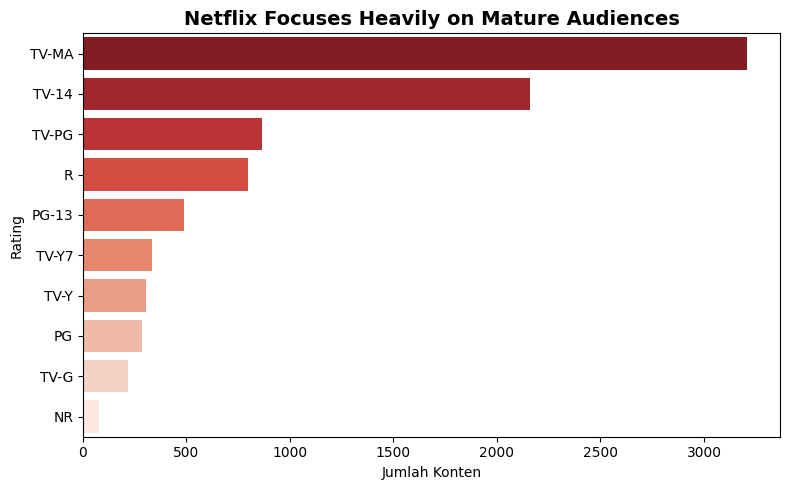

➡ Stakeholder dapat memutuskan untuk memperluas konten keluarga agar jangkauan audiens lebih luas.


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Hitung jumlah konten per rating
rating_count = df['rating'].value_counts().head(10)

# Plot
plt.figure(figsize=(8,5))
sns.barplot(x=rating_count.values, y=rating_count.index, palette='Reds_r')
plt.title("Netflix Focuses Heavily on Mature Audiences", fontsize=14, weight='bold')
plt.xlabel("Jumlah Konten")
plt.ylabel("Rating")
plt.tight_layout()
plt.show()

# Kalimat keputusan:
print("➡ Stakeholder dapat memutuskan untuk memperluas konten keluarga agar jangkauan audiens lebih luas.")

Rating TV-MA (dewasa) dan TV-14 (remaja ke atas) adalah yang paling banyak pada katalog Netflix. **Artinya**, Netflix lebih fokus pada penonton dewasa dibandingkan keluarga atau anak-anak.

# 📈 2️⃣ Insight: Lonjakan Produksi Setelah **2015**
Pertumbuhan Konten Netflix yang Pesat Pasca 2015

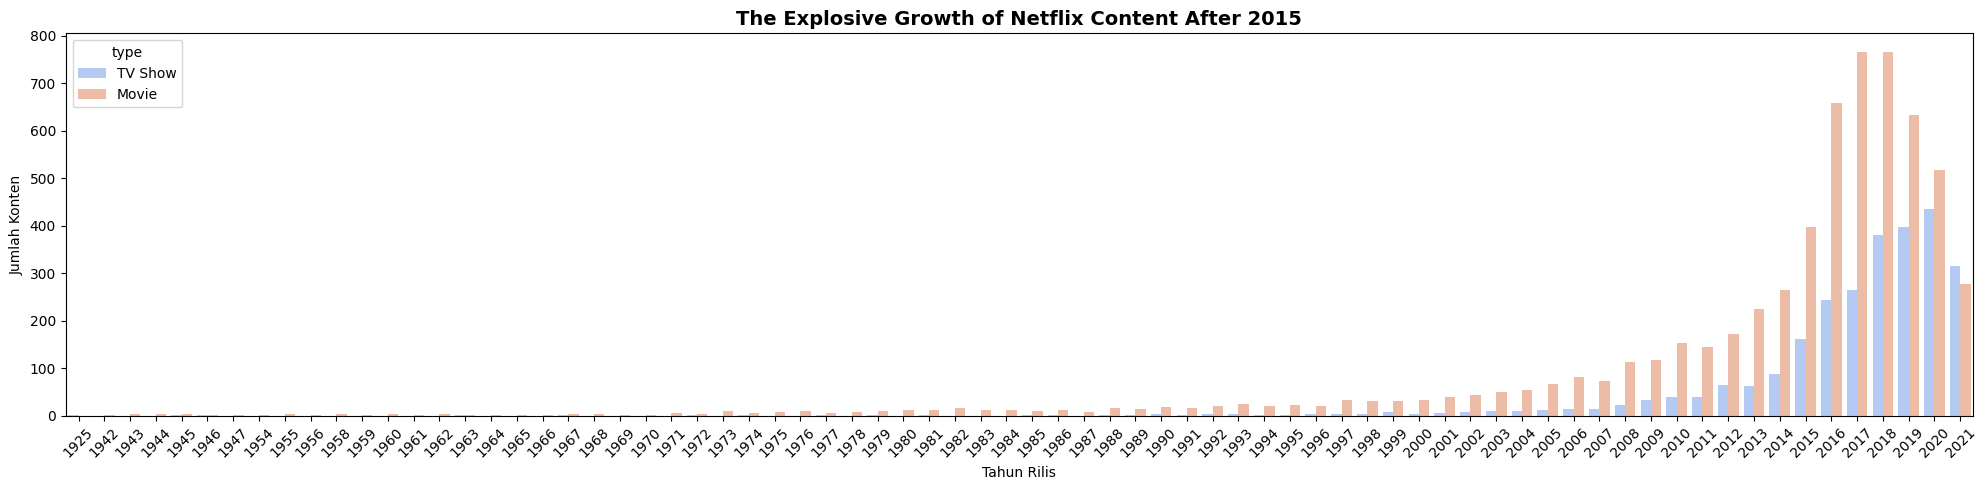

➡ Stakeholder dapat merencanakan strategi produksi konten berdasarkan tahun dengan pertumbuhan paling tinggi.


In [ ]:
# --- VISUALISASI 2: Lonjakan Produksi Setelah 2015 ---
plt.figure(figsize=(20,5))
sns.countplot(data=df, x='release_year', hue='type', palette='coolwarm')
plt.title("The Explosive Growth of Netflix Content After 2015", fontsize=14, weight='bold')
plt.xlabel("Tahun Rilis")
plt.ylabel("Jumlah Konten")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Kalimat keputusan:
print("➡ Stakeholder dapat merencanakan strategi produksi konten berdasarkan tahun dengan pertumbuhan paling tinggi.")


### Hasil: Produksi konten Netflix meningkat tajam setelah tahun 2015, menandakan periode ekspansi besar dalam jumlah film dan serial yang dirilis.

# *🌍 3️⃣ Insight Kompleks: Ketergantungan Negara dan Rating terhadap Jenis Konten (Interaktif)*

Konsentrasi Konten: Bagaimana Netflix Bergantung pada AS dan India

In [ ]:
# --- VISUALISASI 3: Interaktif dengan Plotly ---
import plotly.graph_objects as go
import plotly.express as px

# Ambil 10 negara teratas
top_countries = df['country'].value_counts().head(10).index
subset = df[df['country'].isin(top_countries)]

# Buat data agregat
country_summary = subset.groupby(['country', 'type', 'rating']).size().reset_index(name='count')

# Scatter Bubble Chart Interaktif
fig = px.scatter(
    country_summary,
    x="country",
    y="rating",
    size="count",
    color="type",
    hover_name="country",
    title="Content Concentration: How Netflix Relies on U.S. and India",
    size_max=40
)

# Tambahkan interaksi filter dan selection
fig.update_layout(
    legend_title_text='Type of Content',
    xaxis_title='Country',
    yaxis_title='Rating',
    hovermode='closest'
)

fig.show()

# Kalimat keputusan:
print("➡ Stakeholder dapat memutuskan perluasan lisensi atau produksi di negara dengan kontribusi konten rendah untuk meningkatkan keberagaman konten global.")


➡ Stakeholder dapat memutuskan perluasan lisensi atau produksi di negara dengan kontribusi konten rendah untuk meningkatkan keberagaman konten global.


Visualisasi menunjukkan bahwa produksi konten Netflix sangat didominasi oleh negara seperti Amerika Serikat dan India, terutama untuk film dan TV Show tertentu. Negara lain memiliki jumlah konten jauh lebih sedikit.

➡ Keputusan: Stakeholder dapat mempertimbangkan memperluas lisensi atau produksi di negara dengan kontribusi rendah untuk meningkatkan keberagaman konten global.